In [1]:
import sys
!{sys.executable} -m pip install numpy
import numpy as np
import random
!{sys.executable} -m pip install matplotlib
import matplotlib.pyplot as plt
import collections


[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python3.10 -m pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python3.10 -m pip install --upgrade pip


In [51]:
# this function models 100 prisoners going in to check 50 (out of 100) boxes 
# starting with the box that matches their prison number
# if they find their prison number within 50 boxes
# they live and the next prisoner does the same until all prisoners have their turn
# if all prisoners live, then all prisoners live and that is one prison where everyone lives
# if even one prisoner does not find their number within 50 boxes
# no other prisoner will check
# as all prisoners will die and that is one prison where everyone dies

prisoners = list(range(1, 101, 1)) 
live_or_die = []

def onehundred_prisoners (prisoners):
    list_100 = list(range(1, 101, 1))                                       
    boxes = [0]                                                         # index 0 will always be 0
    boxes = boxes + random.sample(list_100, 100)                        # boxes 0 + random list from 1 - 100                                                                         
    live = 0

    for prison_number in prisoners:
        box_count = 0
        number_in_box = boxes [prison_number]                           # index position is same as prison_number
        box_count += 1

        while number_in_box != prison_number and box_count <50:         # while prison number not found in fewer than 50 boxes
            number_in_box = boxes [number_in_box]                       # index position becomes the number in the previous box
            box_count += 1
        
        if box_count == 50 and number_in_box != prison_number:          # if prison number not found in 50 boxes
            live_or_die.append("die")                                   # add "die" and break from the loop: if one dies, all die
            break

        else:
            live += 1                                                   # if live, add 1
            if live == 100:                                             # if all 100 live    
                live_or_die.append("live")                              # add "live"
            continue
    
    return live_or_die

In [52]:
# this function simulates the 100 prisoners function 100 times (e.g. 100 prisons)
# it finds the percentage of prisons where everyone lives
# and returns a percentage

def simulate_prisoners():    
    for i in range (100):
        simulation = onehundred_prisoners(prisoners)

    live = live_or_die.count("live")                                        # count the number of "live"
    die = live_or_die.count("die")                                          # count the number of "die"
    percent_live = round((live/len(live_or_die)*100.00),2)                  # % live (should be approx 30%)
    return percent_live
    # print(percent_live,"%")


this is the mean percentage of groups that all lived: 31.29


(array([ 2., 14., 32., 38., 14.]),
 array([31.13 , 31.186, 31.242, 31.298, 31.354, 31.41 ]),
 <BarContainer object of 5 artists>)

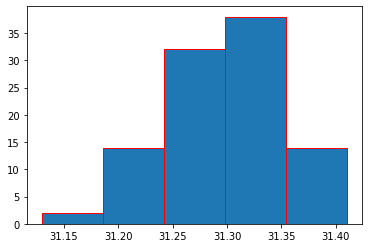

In [54]:
# this function runs the above simulation 100 times (e.g. 100 prisons in each of 100 countries = 10,000 prisons)
# it finds the mean average percentage of prisons where everyone lives
# it prints the mean average
# it plots the percentages in a histogram

percentages_list = []
for i in range (100): 
    mass_simulation = simulate_prisoners()
    percentages_list.append(mass_simulation)

average = np.mean(percentages_list)

# print("here are the percentages of groups that all lived:\n",percentages_list)
print ("\nthis is the mean percentage of groups that all lived:",round(average,2))
plt.hist(percentages_list, edgecolor="red", bins = 5)

In [18]:
list_100 = list(range(1, 101, 1)) 
prisoners = list_100
live_or_die = []

def onehundred_prisoners_random(prisoners):
    for prisoner in prisoners:
        boxes = [0] 
        boxes = boxes + random.sample(list_100, 50)
        live = 0

        if prisoner not in boxes:
            live_or_die.append("die")
            break

        else:
            live += 1                                                   # if live, add 1

            if live == 100:                                             # if all 100 live    
                live_or_die.append("live")                              # add "live"
            continue

        return live_or_die
    
for i in range (250000):
    simulation = onehundred_prisoners_random(prisoners)
    
simulation
live = live_or_die.count("live")                                    # count the number of "live"
die = live_or_die.count("die")                                      # count the number of "die"
percentage_live = round(live/len(live_or_die)*100,2)
print("percentage of prisons where everyone lived: {}".format(percentage_live))

percentage of prisons where everyone lived: 0.0
